In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import joblib
from sklearn.metrics import mean_squared_error
#from sklearn.preprocessing import StandardScaler


%store -r X_features_full
%store -r X_features_poly_full
%store -r y_labels_full

%store -r totaldf_full
totaldf = totaldf_full
X_features = X_features_full
X_features_poly = X_features_poly_full
y_labels = y_labels_full

In [3]:
tree_reg = joblib.load("tree_regressor.pkl")
forest_reg = joblib.load("forest_regressor.pkl")
opt_forest = joblib.load("optimized_forest_regressor.pkl")
rnd_reg = joblib.load("_randomly_optimized_forest_regressor.pkl")
poly_tree = joblib.load("poly_tree_regressor.pkl")
poly_forest = joblib.load("poly_forest_regressor.pkl")

In [4]:
totaldf.insert(7,'tree μ', totaldf.μob*(np.exp(np.power(tree_reg.predict(X_features[2]),2)) -0.0012))
totaldf.insert(8,'forest μ', totaldf.μob*(np.exp(np.power(forest_reg.predict(X_features[2]),2)) -0.0012))
totaldf.insert(9,'grid forest μ', totaldf.μob*(np.exp(np.power(opt_forest.predict(X_features[2]),2)) -0.0012))
totaldf.insert(10,'rand forest μ', totaldf.μob*(np.exp(np.power(rnd_reg.predict(X_features[2]),2)) -0.0012))
totaldf.insert(11,'poly tree μ', totaldf.μob*(np.exp(np.power(poly_tree.predict(X_features_poly[2]),2)) -0.0012))
totaldf.insert(12,'poly forest μ', totaldf.μob*(np.exp(np.power(poly_forest.predict(X_features_poly[2]),2)) -0.0012))

In [5]:
totaldf

,Pb,P,ΔP,μob,μ,Rsob,API,tree μ,forest μ,grid forest μ,rand forest μ,poly tree μ,poly forest μ,Tr
0,2200.008903,2200.008903,0.000000,0.998677,0.998677,478.607857,32.545608,0.998677,0.998677,0.998677,0.998677,0.998677,0.998677,336.150
1,2200.008903,2348.166747,148.157844,0.998677,1.007916,478.607857,32.545608,1.001630,1.011564,1.012035,1.012497,1.009229,1.012222,336.150
2,2200.008903,2496.324590,296.315687,0.998677,1.017489,478.607857,32.545608,1.015027,1.031795,1.030978,1.031844,1.065034,1.027899,336.150
3,2200.008903,2644.482434,444.473531,0.998677,1.027342,478.607857,32.545608,1.042983,1.043898,1.043016,1.044026,1.055116,1.040139,336.150
4,2200.008903,2792.640278,592.631375,0.998677,1.037429,478.607857,32.545608,1.045601,1.050502,1.046850,1.049508,1.028648,1.049973,336.150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,3910.006923,5560.005012,1649.998089,0.125500,0.155127,3229.949353,42.548239,0.148379,0.155648,0.155261,0.157123,0.151274,0.152293,365.928
16,3910.006923,5670.004885,1759.997962,0.125500,0.157136,3229.949353,42.548239,0.149603,0.154693,0.154539,0.157307,0.149603,0.153344,365.928
17,3910.006923,5780.004758,1869.997835,0.125500,0.159149,3229.949353,42.548239,0.173554,0.160511,0.159276,0.160336,0.151148,0.159558,365.928
18,3910.006923,5890.004630,1979.997707,0.125500,0.161165,3229.949353,42.548239,0.173554,0.159696,0.160320,0.161753,0.135756,0.157141,365.928


In [12]:
def Stats_matrix(a):
    average_error = []
    standard_deviation = []
    absolute_average_error = []
    absolute_standard_deviation =[]
    for i in range(6):
        average_error.append(np.average((a.iloc[:,i+7]-a.μ)/a.μ*100))
        standard_deviation.append(np.std((a.iloc[:,i+7]-a.μ)/a.μ*100))
        absolute_average_error.append(np.average(np.absolute((a.iloc[:,i+7]-a.μ)/a.μ*100)))
        absolute_standard_deviation.append(np.std(np.absolute((a.iloc[:,i+7]-a.μ)/totaldf.μ*100)))
    statistics  = pd.DataFrame(list(zip(average_error,standard_deviation,absolute_average_error,
                                        absolute_standard_deviation)),columns = ['% AE','% Std Dev AE','%AAE','% Std Dev AAE'],index = ['Decision Tree ','Random Forest','Grid optimized forest','Random  Grid optimized forest','Decision Tree polynomial features','Random Forest polynomial features'])
    return statistics

Stats_matrix(totaldf)

,% AE,% Std Dev AE,%AAE,% Std Dev AAE
Decision Tree,0.799261,7.514338,4.522638,6.053912
Random Forest,0.033905,4.616826,2.792377,3.676801
Grid optimized forest,0.120544,4.530341,2.821930,3.546157
Random Grid optimized forest,0.149841,4.503367,2.790434,3.537831
Decision Tree polynomial features,0.756340,7.357520,4.639333,5.760360
Random Forest polynomial features,0.026596,4.542327,2.771492,3.598927


In [6]:
visc_0_1 = totaldf.loc[(totaldf.μob<1) & (totaldf.μob>0)]
Stats_matrix(visc_0_1)

,% AE,% Std Dev AE,%AAE,% Std Dev AAE
tree,0.955904,5.964426,3.808441,7.734550
forest,0.469943,3.626270,2.306515,4.569186
grid optimized forest,0.597151,3.508169,2.303764,4.713963
random optimized forest,0.618995,3.492028,2.274554,4.712352
polynomial tree,1.258101,6.252104,4.104901,7.623735
polynomial forest,0.498624,3.602868,2.307499,4.557569


In [7]:
visc_1_5 = totaldf.loc[(totaldf.μob>1) & (totaldf.μob<5)]
Stats_matrix(visc_1_5)

,% AE,% Std Dev AE,%AAE,% Std Dev AAE
tree,-0.194124,9.716474,5.595583,105.269587
forest,-1.333847,5.882409,3.719579,85.004481
grid optimized forest,-1.196461,5.863749,3.682160,83.915115
random optimized forest,-1.200905,5.891646,3.664669,84.713177
polynomial tree,-0.876686,8.515240,5.163131,85.882469
polynomial forest,-1.315025,5.826554,3.665849,84.155636


In [8]:
visc_5_20 = totaldf.loc[(totaldf.μob>5) & (totaldf.μob<20)]
Stats_matrix(visc_5_20)

,% AE,% Std Dev AE,%AAE,% Std Dev AAE
tree,0.485673,8.117187,4.934342,327.522986
forest,-0.005614,5.547132,3.205545,219.877368
grid optimized forest,0.271272,5.504153,3.567800,201.750795
random optimized forest,0.342690,5.376808,3.538622,194.426432
polynomial tree,0.700490,8.573488,5.189214,348.147561
polynomial forest,-0.154623,5.119484,3.030187,196.433516


In [9]:
visc_20_plus = totaldf.loc[(totaldf.μob>20) ]
Stats_matrix(visc_20_plus)

,% AE,% Std Dev AE,%AAE,% Std Dev AAE
tree,4.395426,10.514110,8.128042,1694.242658
forest,1.331927,5.348860,3.726695,875.809468
grid optimized forest,0.054876,5.126121,3.742546,806.380668
random optimized forest,0.262001,4.902352,3.612011,763.859054
polynomial tree,2.164242,9.724796,7.692542,1405.310417
polynomial forest,0.988201,5.493490,3.886824,889.426347


In [10]:
def UndersatErrorPlot(a):
    models = ['tree ','forest','grid optimized forest','random optimized forest','polynomial tree','polynomial forest']
    b = models.index(a)
    plt.scatter((totaldf.ΔP),(totaldf.iloc[:,b+7]-totaldf.μ)/totaldf.μ*100,facecolors='none', edgecolors='b')
    plt.rcParams['figure.figsize'] = (15, 8)
    plt.title(f'Undersaturated Oil Viscosity \n {a}')
    plt.xlabel('Presure-Bubble point pressure(Psia)')
    plt.ylabel('% Error')
    plt.ylabel
  


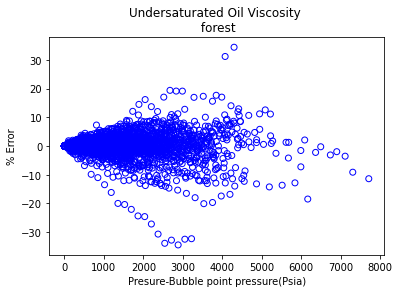

In [11]:
UndersatErrorPlot('forest')

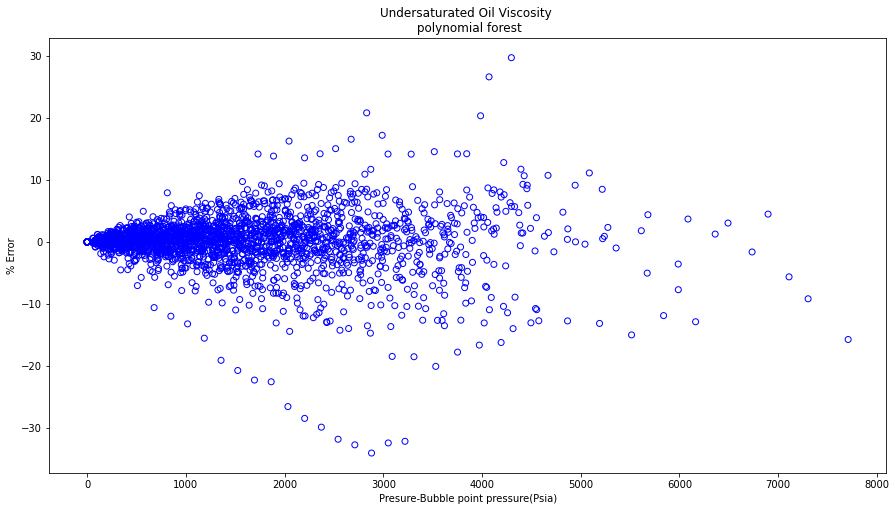

In [12]:
UndersatErrorPlot('polynomial forest')

In [13]:
def UndersatViscPlot(a):
    models = ['tree ','forest','grid optimized forest','random optimized forest','polynomial tree','polynomial forest']
    b = models.index(a)
    plt.scatter(totaldf.μ,totaldf.iloc[:,b+7],facecolors ='none', edgecolors='b')
    plt.rcParams['figure.figsize'] = (15, 8)
    plt.title(f'Undersaturated Oil Viscosity \n {a}')
    plt.xlabel('Measured Viscosity(cp)')
    plt.ylabel('Calculated Viscosity(cp)')

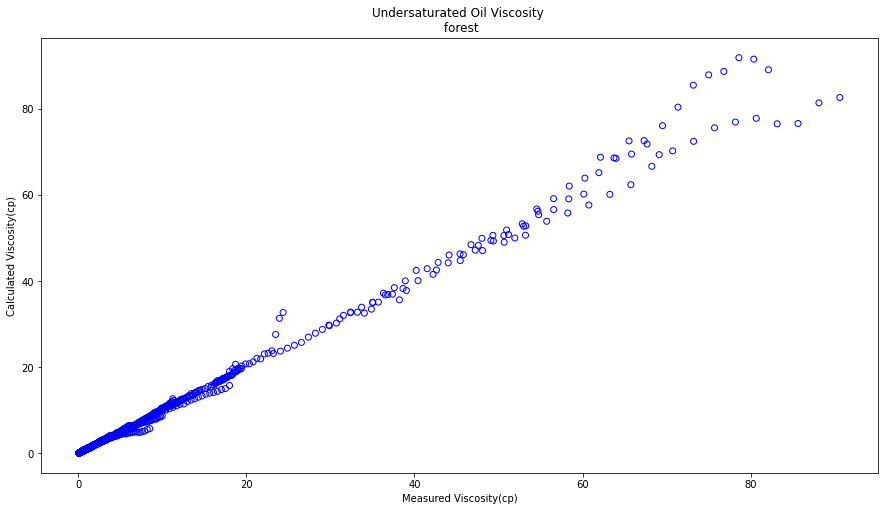

In [14]:
UndersatViscPlot('forest')

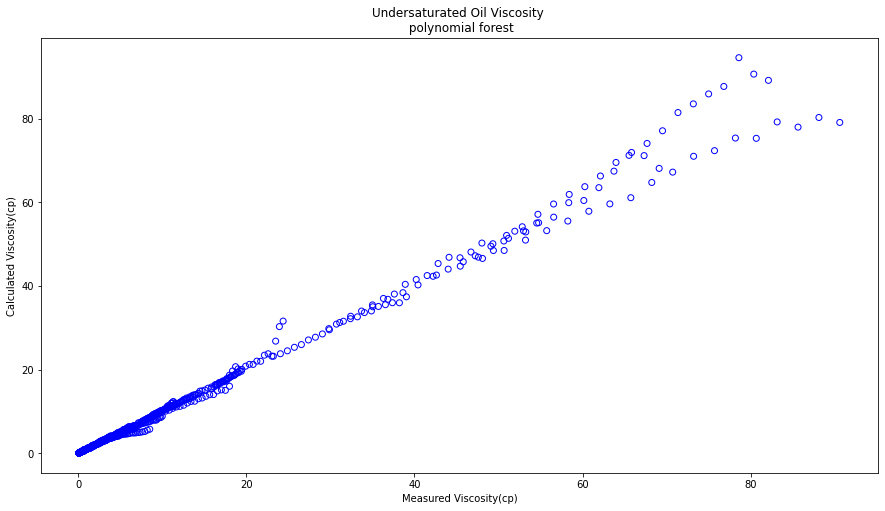

In [15]:
UndersatViscPlot('polynomial forest')

Text(0, 0.5, '% Average Absolute Error')

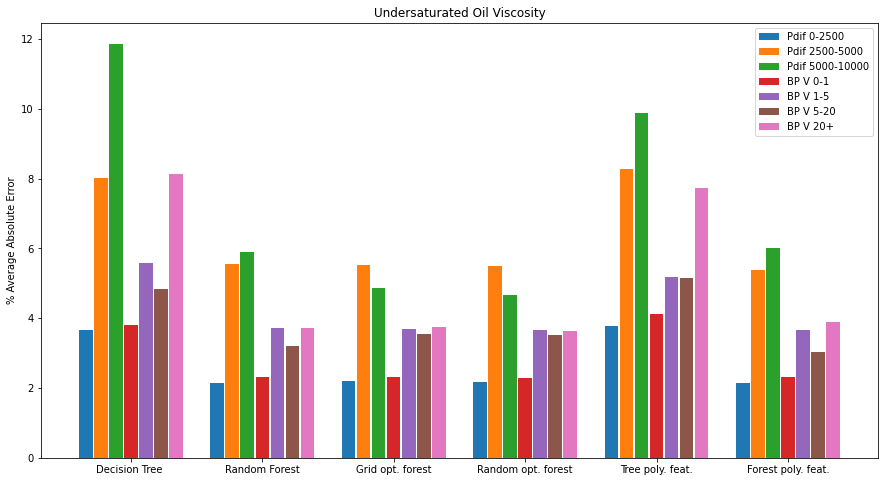

In [13]:
press_0_25 = totaldf.loc[(totaldf.ΔP<2500)]
press_25_50 = totaldf.loc[(totaldf.ΔP<5000)&(totaldf.ΔP>2500)]
press_50_100 = totaldf.loc[(totaldf.ΔP<10000)&(totaldf.ΔP>5000)]
visc_0_1 = totaldf.loc[(totaldf.μob>0) & (totaldf.μob<1)]
visc_1_5 = totaldf.loc[(totaldf.μob>1) & (totaldf.μob<5)]
visc_5_20 = totaldf.loc[(totaldf.μob>5) & (totaldf.μob<20)]
visc_20_plus = totaldf.loc[(totaldf.μob>20) ]

full_data = {
    'Pdif 0-2500' : Stats_matrix(press_0_25).iloc[:,2],
    'Pdif 2500-5000' : Stats_matrix(press_25_50).iloc[:,2],
    'Pdif 5000-10000' : Stats_matrix(press_50_100).iloc[:,2],
    'BP V 0-1' : Stats_matrix(visc_0_1).iloc[:,2],
    'BP V 1-5' : Stats_matrix(visc_1_5).iloc[:,2],
    'BP V 5-20' : Stats_matrix(visc_5_20).iloc[:,2],
    'BP V 20+' : Stats_matrix(visc_20_plus).iloc[:,2],
}    
models = ['Decision Tree ','Random Forest','Grid opt. forest','Random opt. forest','Tree poly. feat.','Forest poly. feat.']



%run my_bar_plot.ipynb
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (15, 8)
bar_plot(ax, full_data, total_width=.8, single_width=.9,)
plt.xticks(range(6), models)
plt.title('Undersaturated Oil Viscosity')
plt.ylabel("% Average Absolute Error")